# Data Cleaning Pipeline

In [1]:
# Only need to assign the two values below first, then run all
watershed = 'EastRiver'
main_str = 'PHISCO'

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import copy
from pandas.plotting import register_matplotlib_converters
from sklearn import linear_model
from sklearn.metrics import r2_score
import copy
import os
import matplotlib.backends.backend_pdf
lm = linear_model.LinearRegression()
np.random.seed(50)
plt.rcParams.update({'figure.max_open_warning': 0})
register_matplotlib_converters()
os.getcwd()

'/Volumes/GoogleDrive/My Drive/DataReleasePaper/ReleaseData/1-EastRiver/DailyData'

In [3]:
# local functions
import sys
sys.path.insert(1, '/Volumes/GoogleDrive/My Drive/DataReleasePaper/ReleaseData/Functions')

from Abnormal_data_values_control import outvalues,threC
from Source_QC_functions_L import interpolateQC, regressorFunc, funcClimateCatalog, AssembleClimateCatalog

In [4]:
# Read the original data table
table = pd.read_csv('1_'+watershed+'_Download_Aggregation_Daily.csv',header = 0,index_col = 'DateTime',
                    parse_dates = True, infer_datetime_format = True,low_memory=False)
display(table.head(2))
display(table.tail(2))

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2014-05-01              NaN                NaN               NaN   
2014-05-02              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2014-05-01                    NaN               NaN               NaN   
2014-05-02                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2014-05-01       4568.230152                NaN             NaN   
2014-05-02       4543.779850                NaN             NaN   

            Rustlers_Discharge  ...  ERCSMWS_SoilTemperature_1016  \
DateTime                        ...                                 
2014-05-01                 NaN  ...                           NaN   
2014-05-02                 NaN  ...                           NaN   

            ERCSMWS_SoilTemperature_2032  ERCSMWS_SoilTemperature_5080  \
DateTime                                                                 
2014-05-01                           NaN                           NaN   
2014-05-02                           NaN                           NaN   

            ERCSMWS_SoilTemperature_10160  JuddFalls_SoilTemperature_508  \
DateTime                                                                   
2014-05-01                            NaN                            NaN   
2014-05-02                            NaN                            NaN   

            JuddFalls_SoilTemperature_2540  JuddFalls_SoilTemperature_5080  \
DateTime                                                                     
2014-05-01                             NaN                             NaN   
2014-05-02                             NaN                             NaN   

            KettlePonds_SoilTemperature_508  KettlePonds_SoilTemperature_2540  \
DateTime                                                                        
2014-05-01                              NaN                               NaN   
2014-05-02                              NaN                               NaN   

            KettlePonds_SoilTemperature_5080  
DateTime                                      
2014-05-01                               NaN  
2014-05-02                               NaN  

[2 rows x 44 columns]

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2018-10-15              NaN                NaN               NaN   
2018-10-16              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2018-10-15                    NaN               NaN               NaN   
2018-10-16                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2018-10-15        684.592084                NaN             NaN   
2018-10-16        741.102828                NaN             NaN   

            Rustlers_Discharge  ...  ERCSMWS_SoilTemperature_1016  \
DateTime                        ...                                 
2018-10-15                 NaN  ...                           NaN   
2018-10-16                 NaN  ...                           NaN   

            ERCSMWS_SoilTemperature_2032  ERCSMWS_SoilTemperature_5080  \
DateTime                                                                 
2018-10-15                           NaN                           NaN   
2018-10-16                           NaN                           NaN   

            ERCSMWS_SoilTemperature_10160  JuddFalls_SoilTemperature_508  \
DateTime                                                                   
2018-10-15                            NaN                            NaN   
2018-10-16                            NaN                            NaN   

            JuddFalls_SoilTemperature_2540  JuddFalls_SoilTemperature_5080  \
DateTime                                                                     
2018-10-15                             NaN                             NaN   
2018-10-16                             NaN                             NaN   

            KettlePonds_SoilTemperature_508  KettlePonds_SoilTemperature_2540  \
DateTime                                                                        
2018-10-15                              NaN                               NaN   
2018-10-16                              NaN                               NaN   

            KettlePonds_SoilTemperature_5080  
DateTime                                      
2018-10-15                               NaN  
2018-10-16                               NaN  

[2 rows x 44 columns]

In [5]:
# Check all the station names
all_stations = table.columns.str.extract(r'([^_]+)')[0]
print('All stations names: ', all_stations.unique())
print ('  ')
nameStrflwStation=[]
nameHydrMetStation=[]
for i in np.arange(len(table.columns)):
    if table.columns[i][-9:]=='Discharge':  ### 
        if not all_stations[i] in nameStrflwStation:
            nameStrflwStation.append(all_stations[i]) ### 
    else:
        if not all_stations[i] in nameHydrMetStation:
            nameHydrMetStation.append(all_stations[i])  ### 

print('Discharge stations :',nameStrflwStation)
print('  ')
print('Meteorology stations:',nameHydrMetStation)                  

All stations names:  ['Avery' 'Bradley' 'Copper' 'EastQuigley' 'Gothic' 'Marmot' 'PHISCO'
 'Quigley' 'Rock' 'Rustlers' '00' '01' '02' '10' '11' '12' '20' '21' '22'
 'Castnet' 'ERCSMWS' 'JuddFalls' 'KettlePonds']
  
Discharge stations : ['Avery', 'Bradley', 'Copper', 'EastQuigley', 'Gothic', 'Marmot', 'PHISCO', 'Quigley', 'Rock', 'Rustlers']
  
Meteorology stations: ['00', '01', '02', '10', '11', '12', '20', '21', '22', 'Castnet', 'ERCSMWS', 'JuddFalls', 'KettlePonds']


In [6]:
for i in table.columns:
    if i.split('_')[0] == main_str :
        print(i)

PHISCO_Discharge


In [7]:
len(nameHydrMetStation)

13

#  1. Trim the original table

In [8]:
# Trim the data and let the table start with first non nan value, end with last non nan value
# Identify the first non nan value in each column as the starting date.
# Identify the last non nan value in each column as the ending date.

t = table.notna() 
t = ~np.isnan(table)
col = len(t.columns)
b = np.zeros([table.shape[1]])
c = np.array([table.shape[0]] * table.shape[1])

for i in range(col):
    if any(t.iloc[:,i]): # Since some are empty
        b[i] = list(np.where(t.iloc[:,i] == True))[0][0] # the first non nan value location
        c[i] = list(np.where(t.iloc[:,i] == True))[0][-1] # the last non nan value location
        
st_tab = b.min()
table1 = table.iloc[int(b.min()):int(c.max()) + 1,:] 

# Display the trimmed table
display(table1.head(2))
display(table1.tail(2))
print('trimmed row number is ', int(table.shape[0] -  table1.shape[0]))

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2014-05-01              NaN                NaN               NaN   
2014-05-02              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2014-05-01                    NaN               NaN               NaN   
2014-05-02                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2014-05-01       4568.230152                NaN             NaN   
2014-05-02       4543.779850                NaN             NaN   

            Rustlers_Discharge  ...  ERCSMWS_SoilTemperature_1016  \
DateTime                        ...                                 
2014-05-01                 NaN  ...                           NaN   
2014-05-02                 NaN  ...                           NaN   

            ERCSMWS_SoilTemperature_2032  ERCSMWS_SoilTemperature_5080  \
DateTime                                                                 
2014-05-01                           NaN                           NaN   
2014-05-02                           NaN                           NaN   

            ERCSMWS_SoilTemperature_10160  JuddFalls_SoilTemperature_508  \
DateTime                                                                   
2014-05-01                            NaN                            NaN   
2014-05-02                            NaN                            NaN   

            JuddFalls_SoilTemperature_2540  JuddFalls_SoilTemperature_5080  \
DateTime                                                                     
2014-05-01                             NaN                             NaN   
2014-05-02                             NaN                             NaN   

            KettlePonds_SoilTemperature_508  KettlePonds_SoilTemperature_2540  \
DateTime                                                                        
2014-05-01                              NaN                               NaN   
2014-05-02                              NaN                               NaN   

            KettlePonds_SoilTemperature_5080  
DateTime                                      
2014-05-01                               NaN  
2014-05-02                               NaN  

[2 rows x 44 columns]

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2018-10-15              NaN                NaN               NaN   
2018-10-16              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2018-10-15                    NaN               NaN               NaN   
2018-10-16                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2018-10-15        684.592084                NaN             NaN   
2018-10-16        741.102828                NaN             NaN   

            Rustlers_Discharge  ...  ERCSMWS_SoilTemperature_1016  \
DateTime                        ...                                 
2018-10-15                 NaN  ...                           NaN   
2018-10-16                 NaN  ...                           NaN   

            ERCSMWS_SoilTemperature_2032  ERCSMWS_SoilTemperature_5080  \
DateTime                                                                 
2018-10-15                           NaN                           NaN   
2018-10-16                           NaN                           NaN   

            ERCSMWS_SoilTemperature_10160  JuddFalls_SoilTemperature_508  \
DateTime                                                                   
2018-10-15                            NaN                            NaN   
2018-10-16                            NaN                            NaN   

            JuddFalls_SoilTemperature_2540  JuddFalls_SoilTemperature_5080  \
DateTime                                                                     
2018-10-15                             NaN                             NaN   
2018-10-16                             NaN                             NaN   

            KettlePonds_SoilTemperature_508  KettlePonds_SoilTemperature_2540  \
DateTime                                                                        
2018-10-15                              NaN                               NaN   
2018-10-16                              NaN                               NaN   

            KettlePonds_SoilTemperature_5080  
DateTime                                      
2018-10-15                               NaN  
2018-10-16                               NaN  

[2 rows x 44 columns]

trimmed row number is  0


### Drop columns without data

In [9]:
tt = copy.deepcopy(table1)
for dd in np.arange(len(tt.columns)):
    if all(pd.isna(tt.iloc[:,dd])):
        print('The empty column is ', dd,tt.columns[dd])
        table1.drop(columns = tt.columns[dd], axis=1, inplace = True)

var_number = table1.shape[1] 

if table1.shape[1]  == table.shape[1] :
    print('There are no empty columns!')

There are no empty columns!


### Save the original discharge table seperately

In [10]:
DischargeTable = pd.DataFrame(index = table1.index)
for i in np.arange(len(nameStrflwStation)):
    DischargeTable[nameStrflwStation[i]+'_Discharge'] = table1.loc[:,nameStrflwStation[i]+'_Discharge']

DischargeTable.to_csv('1_'+ watershed + '_DischargeTable.csv')

# 2. Data filling method: Interpolation

 
0 Avery_Discharge :No missing data!
 
1 Bradley_Discharge :No missing data!
 
2 Copper_Discharge :No missing data!
3 EastQuigley_Discharge index of interpolated length = 14
No filled values are out of original data range
 
 
4 Gothic_Discharge :No missing data!
 
5 Marmot_Discharge :No missing data!
 
6 PHISCO_Discharge :No missing data!
7 Quigley_Discharge index of interpolated length = 14
No filled values are out of original data range
 
 
8 Rock_Discharge :No missing data!
 
9 Rustlers_Discharge :No missing data!
 
10 00_Precipitation :No missing data!
 
11 01_Precipitation :No missing data!
 
12 02_Precipitation :No missing data!
 
13 10_Precipitation :No missing data!
 
14 11_Precipitation :No missing data!
 
15 12_Precipitation :No missing data!
 
16 20_Precipitation :No missing data!
 
17 21_Precipitation :No missing data!
 
18 22_Precipitation :No missing data!
19 Castnet_AirTemperature index of interpolated length = 1
No filled values are out of original data range
 
20 ERCS

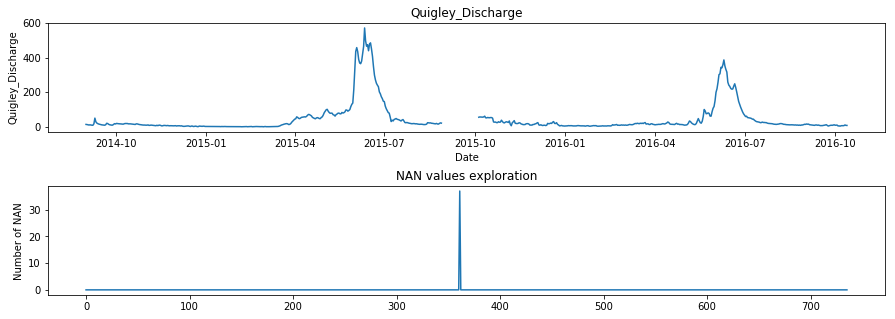

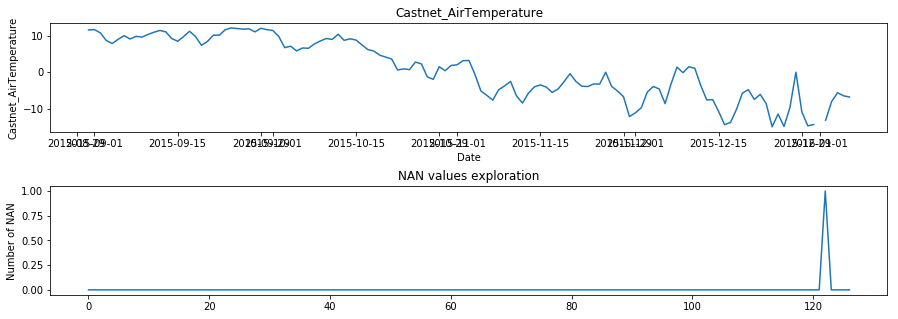

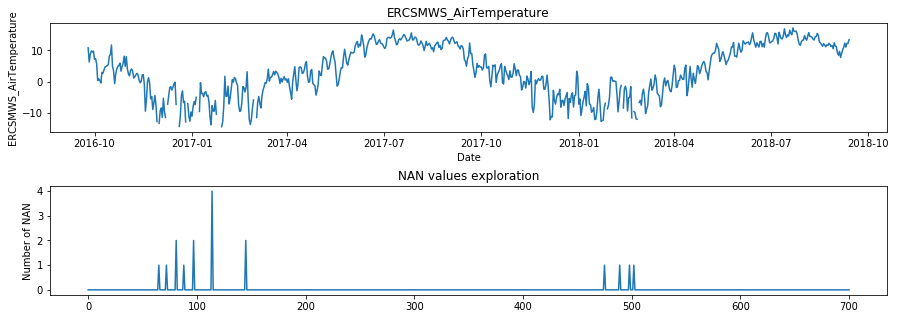

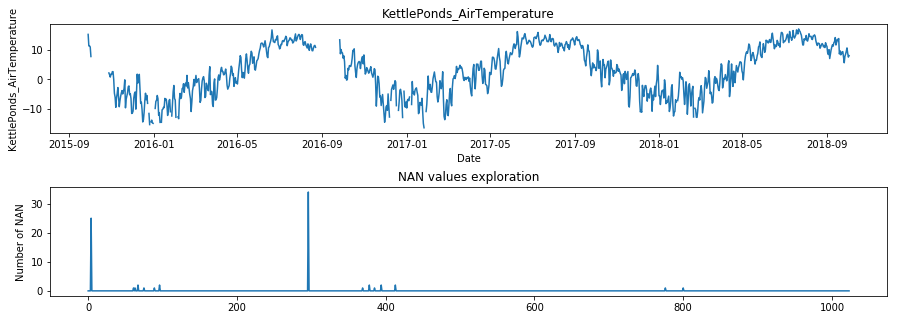

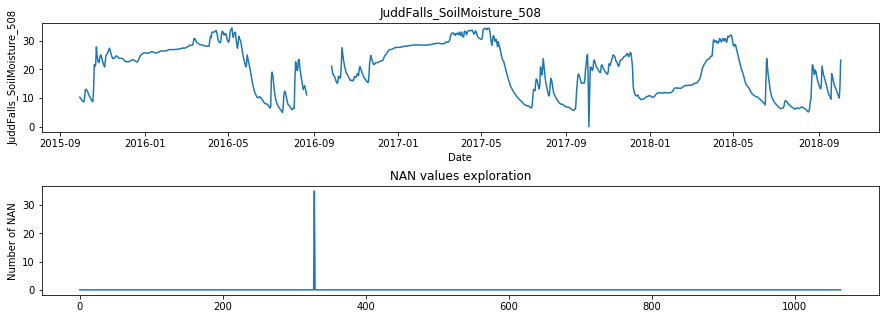

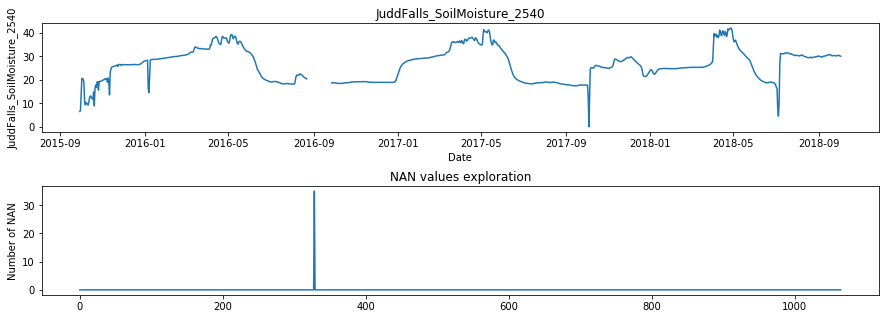

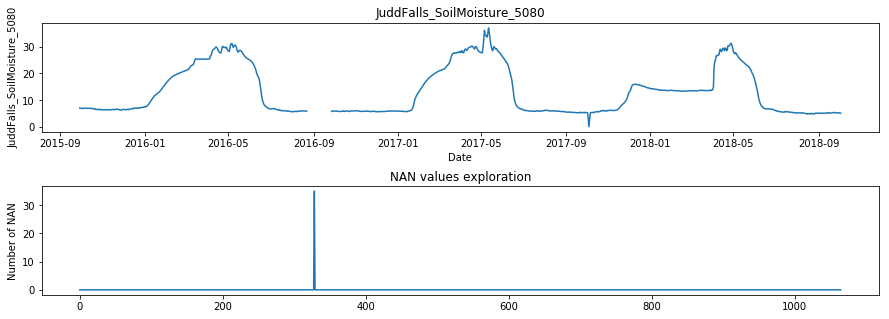

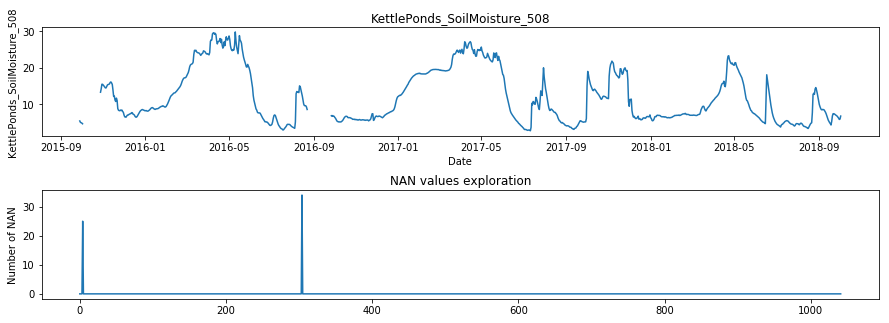

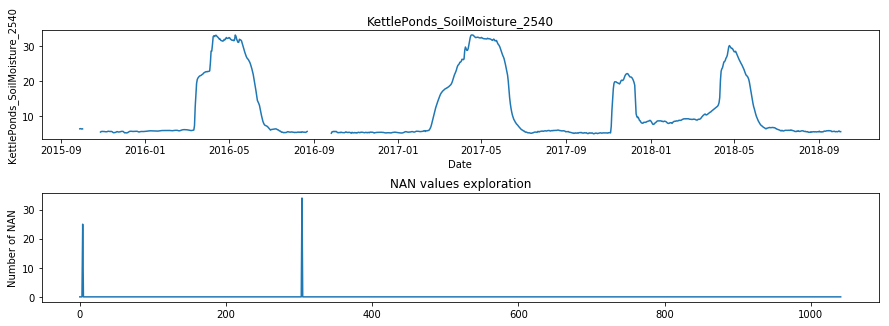

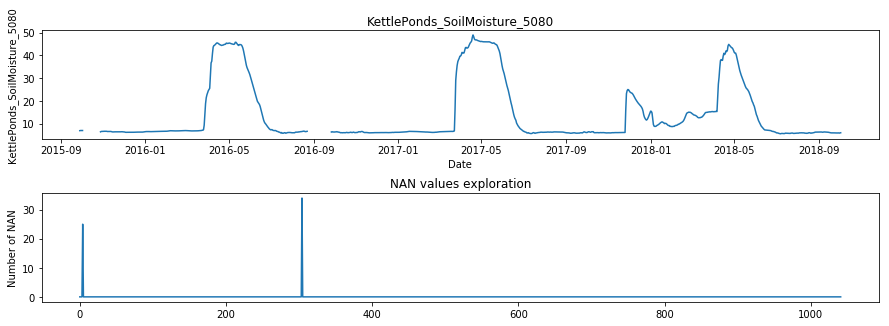

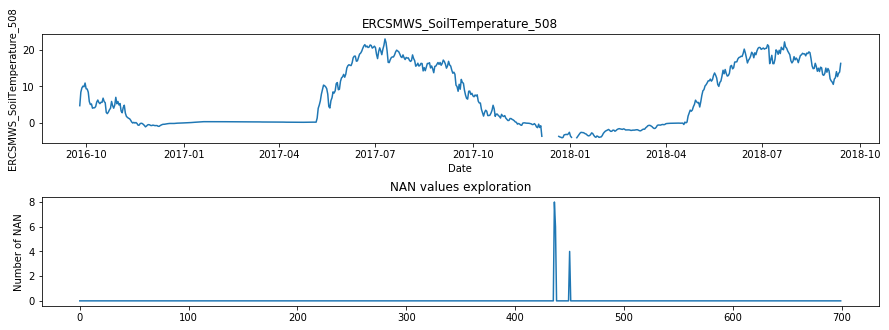

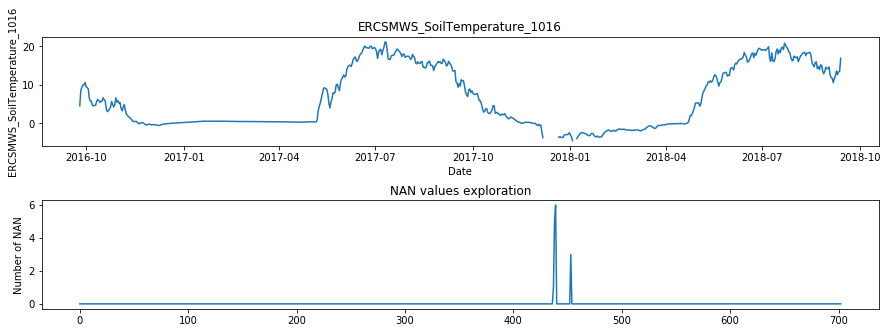

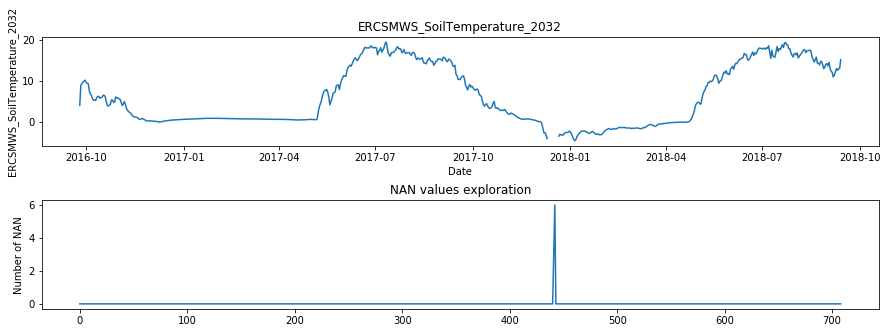

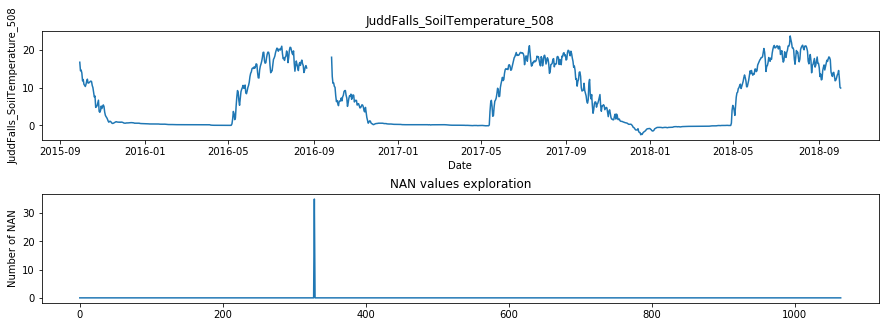

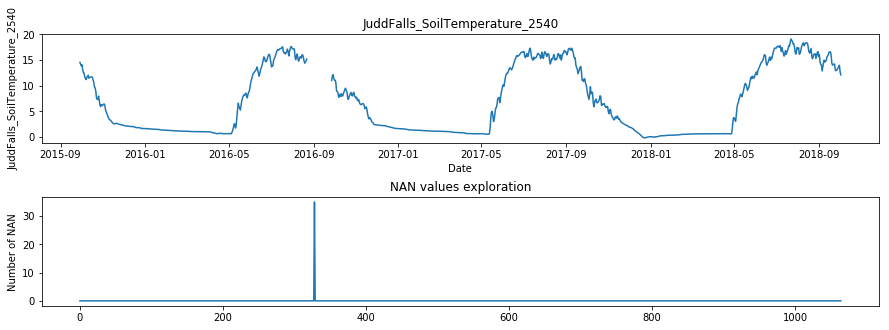

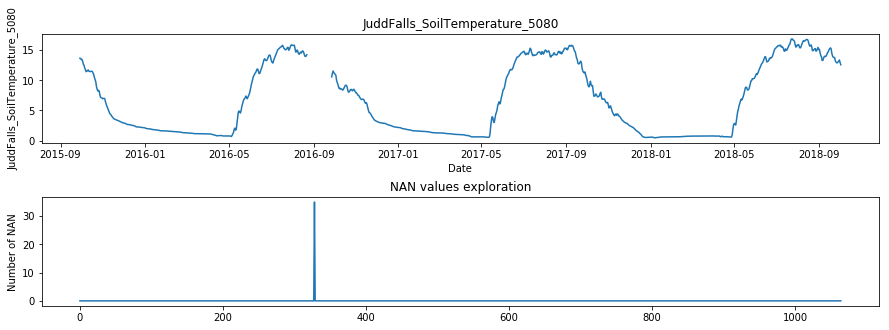

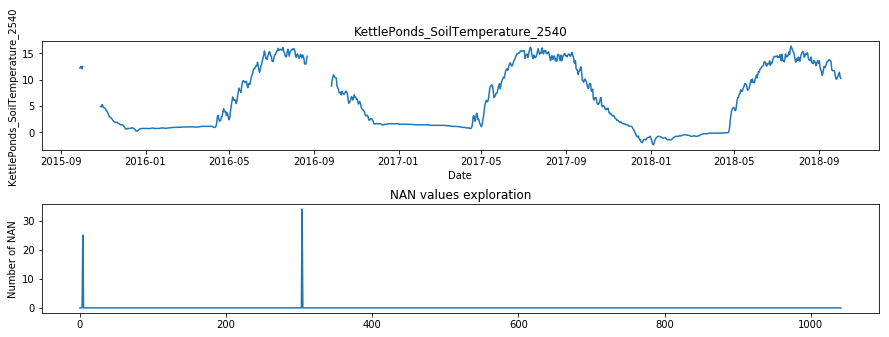

In [11]:
# =====================================
# First data exploration with plots.
# Check the number of Missing values.
# Do interpolation on the missing values positions

# table 2 will be used to be updated with interpolated values
table2=copy.deepcopy(table1) 

# a dictionary that store data record for each column
y1={} 

# Create a flag table(flag_table2) to store interpolation indicators
indexUnique=table2.index
ready_columns=pd.unique(table2.columns) 
if len(pd.unique(table2.columns))!=len(table2.columns):
    print("Duplicate columns exist!")
flag_table2=pd.DataFrame(np.nan*np.ones([len(indexUnique),len(ready_columns)]),
                 index = indexUnique, columns=ready_columns) 


for k,VarName in enumerate(ready_columns): # column of variable being processed 
    y1[k]=table2[VarName].copy(deep = True)
    ind=np.where(~np.isnan(y1[k].to_numpy())) # index where y1 has value (not NaN)
    flag_table2[VarName][ind[0]] = int(1) # set indicator 1 to original data positions
    start = ind[0][0]
    end = ind[0][-1]
    missing_index = list(set(range(start,end+1)) - set(ind[0]))
    flag_table2[VarName][missing_index] = int(0) # set indicator 0 to missing data positions
    y1[k] = y1[k][start:end+1] # trim y1   
    
    # Print out whether the column contain missing values
    dim = np.shape(ind)[1] # number of exsiting data points 
    if (dim != len(y1[k])): # there are missing data
        #===========================
        # For those columns that contain missing values:Plot the data and indicate nan values position and length
        fig1 = plt.figure(figsize=[15,5])
        sp1, sp2 = fig1.add_subplot(211), fig1.add_subplot(212)
        sp1.plot(y1[k])
        sp1.set_title(table2.columns[k])
        sp1.set_xlabel('Date')
        sp1.set_ylabel(table2.columns[k])
    
        index = np.argwhere(~np.isnan(y1[k].to_numpy())) # An array of index that the value is not nan (where data exist)
        lenNAN = (np.diff(index,axis=0)) - 1 # An array that indicate the NAN value number along data record

        pd.DataFrame(lenNAN)
        sp2.plot(lenNAN)
        sp2.set_title("NAN values exploration")
        sp2.set_ylabel('Number of NAN')
        plt.subplots_adjust(hspace=0.5)

        #===========================
        # For those columns that contain missing values: Do Interpolation 
        y2, nanR, whereINT=interpolateQC(pd.DataFrame(y1[k]),inteplimit = 7,name = VarName,k=k) # maximum interpolation length is 3! days
        # Update table 3 with interpolated values
        table2.loc[:,VarName]=y2[0] 
        
        # Update flag table with interpolation indicators 2
        flag_table2[VarName][np.reshape(whereINT[0], whereINT[0].shape[0])+start] = int(2) 
        
        # Check if the value is out of original threshold, don't forget to change flag table as well
        outvalues(table, table2, flag_table2, VarName)
        print(" ")
    else:    
        print(" ")
        print(k,VarName, ":No missing data!")

### Store the data table and the flag table after interpolation

In [12]:
flag_table2.head(2)

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2014-05-01              NaN                NaN               NaN   
2014-05-02              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2014-05-01                    NaN               NaN               NaN   
2014-05-02                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2014-05-01               1.0                NaN             NaN   
2014-05-02               1.0                NaN             NaN   

            Rustlers_Discharge  ...  ERCSMWS_SoilTemperature_1016  \
DateTime                        ...                                 
2014-05-01                 NaN  ...                           NaN   
2014-05-02                 NaN  ...                           NaN   

            ERCSMWS_SoilTemperature_2032  ERCSMWS_SoilTemperature_5080  \
DateTime                                                                 
2014-05-01                           NaN                           NaN   
2014-05-02                           NaN                           NaN   

            ERCSMWS_SoilTemperature_10160  JuddFalls_SoilTemperature_508  \
DateTime                                                                   
2014-05-01                            NaN                            NaN   
2014-05-02                            NaN                            NaN   

            JuddFalls_SoilTemperature_2540  JuddFalls_SoilTemperature_5080  \
DateTime                                                                     
2014-05-01                             NaN                             NaN   
2014-05-02                             NaN                             NaN   

            KettlePonds_SoilTemperature_508  KettlePonds_SoilTemperature_2540  \
DateTime                                                                        
2014-05-01                              NaN                               NaN   
2014-05-02                              NaN                               NaN   

            KettlePonds_SoilTemperature_5080  
DateTime                                      
2014-05-01                               NaN  
2014-05-02                               NaN  

[2 rows x 44 columns]

In [13]:
table2.to_csv('2_' + watershed + '_Interpolation.csv', sep=',')
flag_table2.to_csv('2_' + watershed + '_Interpolation_Flag.csv', sep=',')
all(table2.columns == flag_table2.columns)

True

# 3. Data filling method: Regression (across stations)

In [14]:
# Some functions to be used
def get_ind(table,var):
    nameTab = pd.Series(table.columns)
    n_Tab = nameTab.apply(lambda x: x.split('_'))[:]
    var_stn = table.columns[n_Tab.apply(lambda x: x[1] == var)]
    range_all = np.array([np.where(~np.isnan(table[c].to_numpy()))[0] for c in var_stn])
    start = np.min([x[0] for x in range_all])
    end = np.max([x[-1] for x in range_all])
    ind = table.index[start:end+1]
    return ind 

def fromEveryStationPoolAvariable(stn_names,var,ind,stn_table_dic): 
# stn_names is names for all stns, var is a variable name, ind is the index of stn i 
# stn_table_dic is a dictionary storing data by stn, nn is an empty df
    nn = pd.DataFrame(index=ind)
    for k in np.arange(len(stn_names)): # read the station table
        tabReg2 = stn_table_dic[k] # the table for stn k
        for m in np.arange(len(tabReg2.columns)): # for each observation at stn k
             if str.find(tabReg2.columns[m],var) != -1: # stn k has observation for this variable(var)
                useful_col=tabReg2.columns[m]
                ind2=get_ind(tabReg2,var)
                overlap_time=pd.Series(list(set(ind)&set(ind2)))
                if len(overlap_time)!=0: #stn i and stn k have overlapped time range for var
                    nn.loc[overlap_time,useful_col] = tabReg2.loc[overlap_time,useful_col] #get the data of this variable at stn k                
                
    return nn


def regressionAtStationForAvariable(nn,stnName,var): #stnName = stn_names[i]
    nameTab = pd.Series(nn.columns)
    n_Tab = nameTab.apply(lambda x: x.split('_'))[:]
    stnofInterest = n_Tab.apply(lambda x: x[0] == stnName) # station name is at the beigning
    colInt = np.argwhere(stnofInterest.to_numpy() == 1)  
    mesName = nn.columns # all the column names for this variable(var)   
    
    for col in colInt:
        p = np.delete(np.arange(len(mesName)), col)# get rid of the col that will be apply regression method
        tt = nn.iloc[:,np.r_[col,p]]# put the target col at the first
        regR = regressorFunc(tt,regThres=0.7)

        
        # return ind_interp
        # location where Regression happened
        #ind_interp = np.argwhere(regR != nn.iloc[:,col].to_numpy()) # this is commented out because it can't discriminate nan values
  
        # plot 
        plt.figure(figsize=[5,1])
        plt.plot(regR,color='black',label= var+' After regression')
        plt.plot(np.array(nn.iloc[:,col]), color='red', label='Raw data')        
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.title(nn.columns[col])    
        
        # Update the variable table
        nn.iloc[:,col] = regR
    return nn

### Do regression across all stations

In [15]:
# table3 will be updated with regression values
table3 = copy.deepcopy(table2)
flag_table3 = copy.deepcopy(flag_table2)

In [16]:
# Store tables into a dictionary seperated by stations, store the data after interpolation
stn_table_dic = {}
col_names = pd.Series(table2.columns)
n_tab = col_names.apply(lambda x: x.split('_'))[:]
var_names = n_tab.apply(lambda x: x[1]).unique()
stn_names = n_tab.apply(lambda x: x[0]).unique()
print('var_names:',var_names)

for i in range(len(stn_names)): # column of variable being processed
    station = stn_names[i] 
    #print(station)
    station_lst = []
    for col in col_names:
        if col.split('_')[0] == station:
            station_lst.append(col)
    #print(station_lst)
    stn_table_dic[i] = copy.deepcopy(table2[station_lst])
    
# check if the results of all station have been stored
len(stn_table_dic.keys()) == len(stn_names)

var_names: ['Discharge' 'Precipitation' 'AirTemperature' 'RelativeHumidity'
 'SnowDepth' 'SoilMoisture' 'SoilTemperature']


True

1 / 23 in process: Avery Discharge
 
No Precipitation data at station Avery
 
No AirTemperature data at station Avery
 
No RelativeHumidity data at station Avery
 
No SnowDepth data at station Avery
 
No SoilMoisture data at station Avery
 
No SoilTemperature data at station Avery
 
2 / 23 in process: Bradley Discharge
 
No Precipitation data at station Bradley
 
No AirTemperature data at station Bradley
 
No RelativeHumidity data at station Bradley
 
No SnowDepth data at station Bradley
 
No SoilMoisture data at station Bradley
 
No SoilTemperature data at station Bradley
 
3 / 23 in process: Copper Discharge
 
No Precipitation data at station Copper
 
No AirTemperature data at station Copper
 
No RelativeHumidity data at station Copper
 
No SnowDepth data at station Copper
 
No SoilMoisture data at station Copper
 
No SoilTemperature data at station Copper
 
4 / 23 in process: EastQuigley Discharge
 
No Precipitation data at station EastQuigley
 
No AirTemperature data at station Eas

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


 
21 / 23 in process: ERCSMWS SnowDepth
 
No SoilMoisture data at station ERCSMWS
 
21 / 23 in process: ERCSMWS SoilTemperature
 
No Discharge data at station JuddFalls
 
No Precipitation data at station JuddFalls
 
22 / 23 in process: JuddFalls AirTemperature
 
22 / 23 in process: JuddFalls RelativeHumidity
 
22 / 23 in process: JuddFalls SnowDepth
 
22 / 23 in process: JuddFalls SoilMoisture
 
22 / 23 in process: JuddFalls SoilTemperature
 
No Discharge data at station KettlePonds
 
No Precipitation data at station KettlePonds
 
23 / 23 in process: KettlePonds AirTemperature
 
No RelativeHumidity data at station KettlePonds
 
No SnowDepth data at station KettlePonds
 
23 / 23 in process: KettlePonds SoilMoisture
 
23 / 23 in process: KettlePonds SoilTemperature
 
CPU times: user 6.17 s, sys: 119 ms, total: 6.29 s
Wall time: 3.41 s


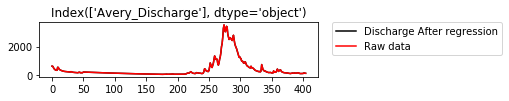

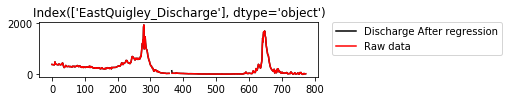

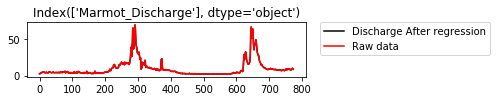

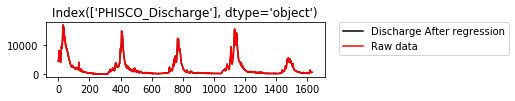

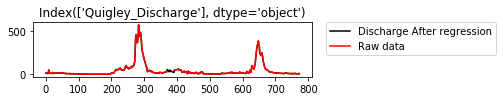

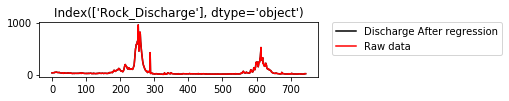

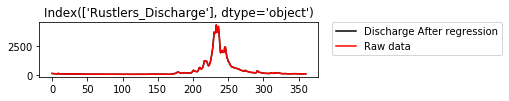

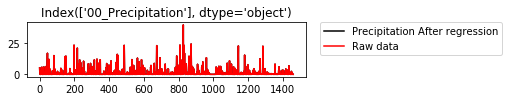

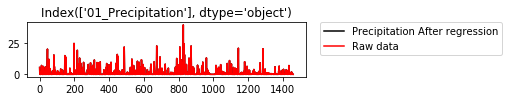

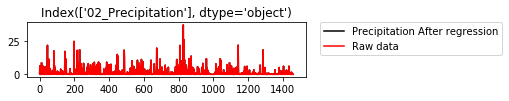

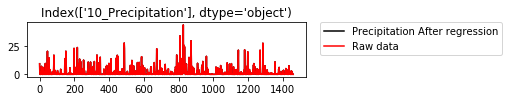

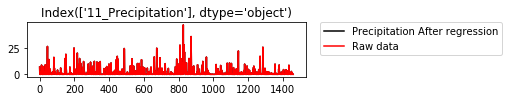

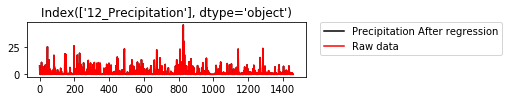

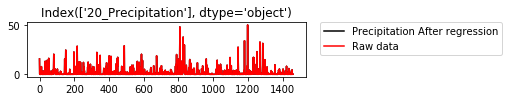

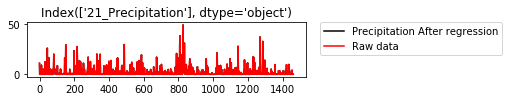

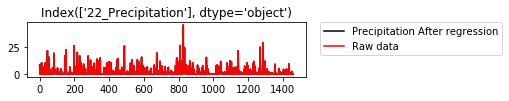

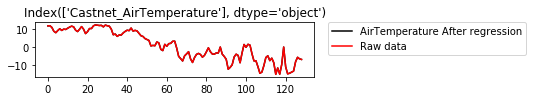

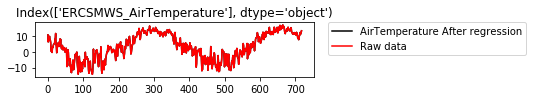

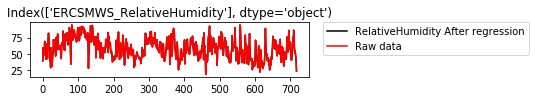

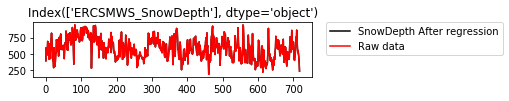

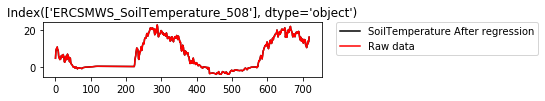

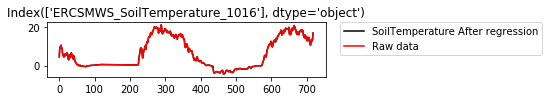

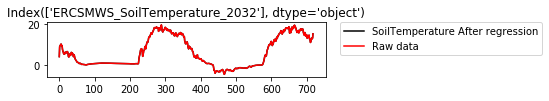

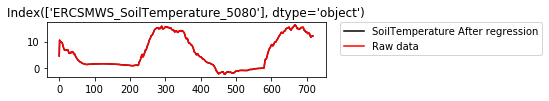

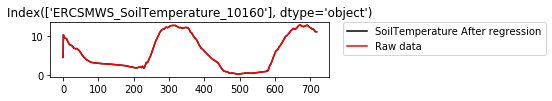

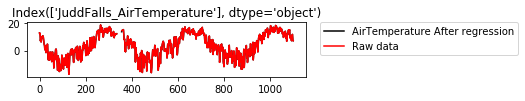

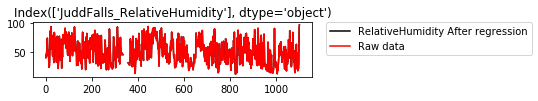

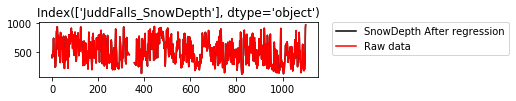

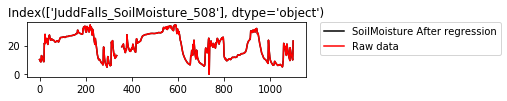

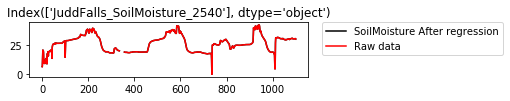

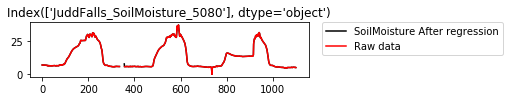

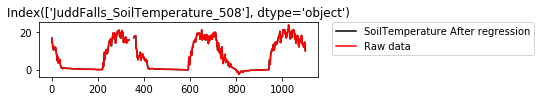

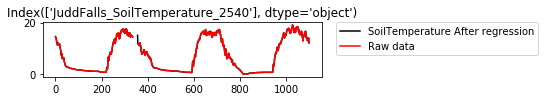

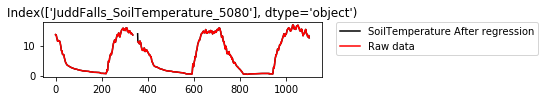

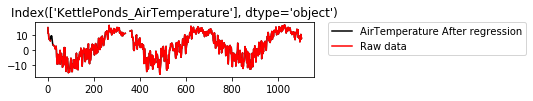

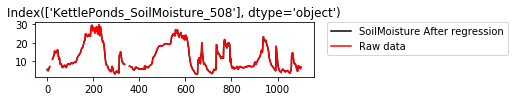

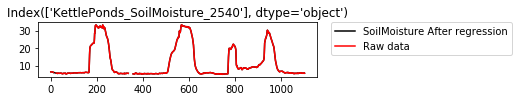

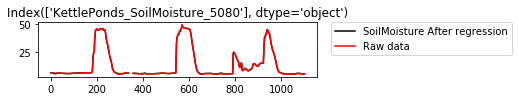

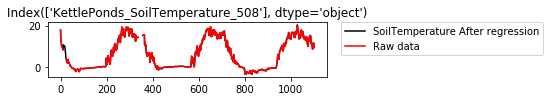

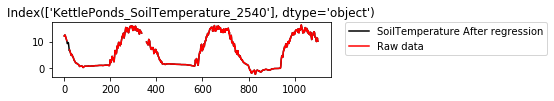

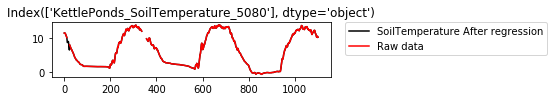

In [17]:
%%time
for i in np.arange(len(stn_names)): # Each met station
    tabReg = stn_table_dic[i]  # extract the table for station i from the dictionary
    for j in np.arange(len(var_names)): # loop across variables, not looping for discharge
        var = var_names[j] # for each meteorology variable
        if var in pd.unique(np.array([c.split('_')[1] for c in tabReg.columns])):
            ind = get_ind(tabReg,var)
            print(i+1,"/",len(stn_names),"in process:",stn_names[i],var)
            # Fill single variable from multiple stations
            nn = fromEveryStationPoolAvariable(stn_names, var, ind, stn_table_dic)
            ## nn is a df storing the all the data for the same variable(var)

            # Do regression across stations for met station i, variable j
            result = regressionAtStationForAvariable(nn, stn_names[i], var)
            regressed_cols = pd.Series(list(set(result.columns) & set(tabReg.columns)),dtype='object') # column where regression is done
            
            # Update table3 with regression results
            #print('Finishing regression on Station', stn_names[i], var) 
            for k in np.arange(len(regressed_cols)):
                rcol=regressed_cols[k]
                reg=result[rcol]
                table3.loc[reg.index[0]:reg.index[-1],rcol] = np.array(reg)
        else:
            print("No",var,"data at station",stn_names[i])
        print(' ')

In [18]:
# Write indicators of regression into flag table
for j in range(len(col_names)):
    col = col_names[j]
    for m in table3[col].index:  
        if str(table2[col][m]) == 'nan':
            if str(table3[col][m])!= 'nan':
                flag_table3[col][m] = int(3)

In [19]:
# Check the regression values and delete out of range values
for col in col_names:
    outvalues(table, table3, flag_table3, col)

No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original dat

In [20]:
# Store the data table and the flag table
table3.to_csv('3_'+watershed+'_Regression.csv', sep=',')
flag_table3.to_csv('3_'+watershed+'_Regression_Flag.csv', sep=',')

# 4. Data filling method: Climate Catalog

In [21]:
# Extract discharge table
DischargeTable = pd.DataFrame(index = table3.index)
for i in np.arange(len(nameStrflwStation)):
    DischargeTable[nameStrflwStation[i]+'_Discharge'] = table3.loc[:,nameStrflwStation[i]+'_Discharge']
DischargeTable.head(2)

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2014-05-01              NaN                NaN               NaN   
2014-05-02              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2014-05-01                    NaN               NaN               NaN   
2014-05-02                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2014-05-01       4568.230152                NaN             NaN   
2014-05-02       4543.779850                NaN             NaN   

            Rustlers_Discharge  
DateTime                        
2014-05-01                 NaN  
2014-05-02                 NaN

In [22]:
y3 = {}
for i in np.arange(len(table3.columns)):
    col_name = table3.columns[i]
    range_y3 = np.where(~np.isnan(table3[col_name].to_numpy()))[0]
    start = range_y3[0]
    end = range_y3[-1]
    y3[i] = table3[col_name][start:end+1]
AnT = funcClimateCatalog(table3, y3, 270, watershed, 0.7) # divide the data by year
table4,whereClimateCat = AssembleClimateCatalog(AnT, y3, table3, watershed)

/Volumes/GoogleDrive/My Drive/DataReleasePaper/ReleaseData/Functions/Source_QC_functions_L.py:135: RuntimeWarning: Mean of empty slice
  AnnualMean = (np.nanmean(AnnualTable,axis=0)) #(np.nanmedian(AnnualTable,axis=0))
/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Volumes/GoogleDrive/My Drive/DataReleasePaper/ReleaseData/Functions/Source_QC_functions_L.py:137: RuntimeWarning: All-NaN slice encountered
  AnnualMax = (np.nanmax(AnnualTable,axis=0)) # for outliers MAx
/Volumes/GoogleDrive/My Drive/DataReleasePaper/ReleaseData/Functions/Source_QC_functions_L.py:138: RuntimeWarning: All-NaN slice encountered
  AnnualMin = (np.nanmin(AnnualTable,axis=0)) # minimum


0 Avery_Discharge 0
1 Bradley_Discharge 0
2 Copper_Discharge 0
3 EastQuigley_Discharge 7
4 Gothic_Discharge 0
5 Marmot_Discharge 0
6 PHISCO_Discharge 0
7 Quigley_Discharge 0
8 Rock_Discharge 0
9 Rustlers_Discharge 0
10 00_Precipitation 0
11 01_Precipitation 0
12 02_Precipitation 0
13 10_Precipitation 0
14 11_Precipitation 0
15 12_Precipitation 0
16 20_Precipitation 0
17 21_Precipitation 0
18 22_Precipitation 0
19 Castnet_AirTemperature 0
20 ERCSMWS_AirTemperature 0
21 JuddFalls_AirTemperature 20
22 KettlePonds_AirTemperature 20
23 ERCSMWS_RelativeHumidity 0
24 JuddFalls_RelativeHumidity 21
25 ERCSMWS_SnowDepth 0
26 JuddFalls_SnowDepth 21
27 JuddFalls_SoilMoisture_508 21
28 JuddFalls_SoilMoisture_2540 21
29 JuddFalls_SoilMoisture_5080 20
30 KettlePonds_SoilMoisture_508 20
31 KettlePonds_SoilMoisture_2540 20
32 KettlePonds_SoilMoisture_5080 20
33 ERCSMWS_SoilTemperature_508 0
34 ERCSMWS_SoilTemperature_1016 0
35 ERCSMWS_SoilTemperature_2032 0
36 ERCSMWS_SoilTemperature_5080 0
37 ERCSMWS_

In [23]:
# Write indicators of ClimateCatalog into flag table4
flag_table4 = copy.deepcopy(flag_table3)
for j in range(len(col_names)):
    col = col_names[j]
    for m in table4[col].index:  
        if str(table3[col][m]) == 'nan':
            if str(table4[col][m])!= 'nan':
                flag_table4[col][m] = int(4)

In [24]:
# Check the regression values and delete out of range values
for col in col_names:
    outvalues(table, table4, flag_table4, col)

No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original data range
No filled values are out of original dat

In [25]:
# Store the data table and the flag table
table4.to_csv('4_'+watershed+'_ClimateCatalog.csv', sep=',')
flag_table4.to_csv('4_'+watershed+'_ClimateCatalog_Flag.csv', sep=',')

In [26]:
table4.head()

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2014-05-01              NaN                NaN               NaN   
2014-05-02              NaN                NaN               NaN   
2014-05-03              NaN                NaN               NaN   
2014-05-04              NaN                NaN               NaN   
2014-05-05              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2014-05-01                    NaN               NaN               NaN   
2014-05-02                    NaN               NaN               NaN   
2014-05-03                    NaN               NaN               NaN   
2014-05-04                    NaN               NaN               NaN   
2014-05-05                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2014-05-01       4568.230152                NaN             NaN   
2014-05-02       4543.779850                NaN             NaN   
2014-05-03       4977.839947                NaN             NaN   
2014-05-04       6078.289986                NaN             NaN   
2014-05-05       7209.310055                NaN             NaN   

            Rustlers_Discharge  ...  ERCSMWS_SoilTemperature_1016  \
DateTime                        ...                                 
2014-05-01                 NaN  ...                           NaN   
2014-05-02                 NaN  ...                           NaN   
2014-05-03                 NaN  ...                           NaN   
2014-05-04                 NaN  ...                           NaN   
2014-05-05                 NaN  ...                           NaN   

            ERCSMWS_SoilTemperature_2032  ERCSMWS_SoilTemperature_5080  \
DateTime                                                                 
2014-05-01                           NaN                           NaN   
2014-05-02                           NaN                           NaN   
2014-05-03                           NaN                           NaN   
2014-05-04                           NaN                           NaN   
2014-05-05                           NaN                           NaN   

            ERCSMWS_SoilTemperature_10160  JuddFalls_SoilTemperature_508  \
DateTime                                                                   
2014-05-01                            NaN                            NaN   
2014-05-02                            NaN                            NaN   
2014-05-03                            NaN                            NaN   
2014-05-04                            NaN                            NaN   
2014-05-05                            NaN                            NaN   

            JuddFalls_SoilTemperature_2540  JuddFalls_SoilTemperature_5080  \
DateTime                                                                     
2014-05-01                             NaN                             NaN   
2014-05-02                             NaN                             NaN   
2014-05-03                             NaN                             NaN   
2014-05-04                             NaN                             NaN   
2014-05-05                             NaN                             NaN   

            KettlePonds_SoilTemperature_508  KettlePonds_SoilTemperature_2540  \
DateTime                                                                        
2014-05-01                              NaN                               NaN   
2014-05-02                              NaN                               NaN   
2014-05-03                              NaN                               NaN   
2014-05-04                              NaN                      

In [27]:
flag_table4.head()

Avery_Discharge  Bradley_Discharge  Copper_Discharge  \
DateTime                                                           
2014-05-01              NaN                NaN               NaN   
2014-05-02              NaN                NaN               NaN   
2014-05-03              NaN                NaN               NaN   
2014-05-04              NaN                NaN               NaN   
2014-05-05              NaN                NaN               NaN   

            EastQuigley_Discharge  Gothic_Discharge  Marmot_Discharge  \
DateTime                                                                
2014-05-01                    NaN               NaN               NaN   
2014-05-02                    NaN               NaN               NaN   
2014-05-03                    NaN               NaN               NaN   
2014-05-04                    NaN               NaN               NaN   
2014-05-05                    NaN               NaN               NaN   

            PHISCO_Discharge  Quigley_Discharge  Rock_Discharge  \
DateTime                                                          
2014-05-01               1.0                NaN             NaN   
2014-05-02               1.0                NaN             NaN   
2014-05-03               1.0                NaN             NaN   
2014-05-04               1.0                NaN             NaN   
2014-05-05               1.0                NaN             NaN   

            Rustlers_Discharge  ...  ERCSMWS_SoilTemperature_1016  \
DateTime                        ...                                 
2014-05-01                 NaN  ...                           NaN   
2014-05-02                 NaN  ...                           NaN   
2014-05-03                 NaN  ...                           NaN   
2014-05-04                 NaN  ...                           NaN   
2014-05-05                 NaN  ...                           NaN   

            ERCSMWS_SoilTemperature_2032  ERCSMWS_SoilTemperature_5080  \
DateTime                                                                 
2014-05-01                           NaN                           NaN   
2014-05-02                           NaN                           NaN   
2014-05-03                           NaN                           NaN   
2014-05-04                           NaN                           NaN   
2014-05-05                           NaN                           NaN   

            ERCSMWS_SoilTemperature_10160  JuddFalls_SoilTemperature_508  \
DateTime                                                                   
2014-05-01                            NaN                            NaN   
2014-05-02                            NaN                            NaN   
2014-05-03                            NaN                            NaN   
2014-05-04                            NaN                            NaN   
2014-05-05                            NaN                            NaN   

            JuddFalls_SoilTemperature_2540  JuddFalls_SoilTemperature_5080  \
DateTime                                                                     
2014-05-01                             NaN                             NaN   
2014-05-02                             NaN                             NaN   
2014-05-03                             NaN                             NaN   
2014-05-04                             NaN                             NaN   
2014-05-05                             NaN                             NaN   

            KettlePonds_SoilTemperature_508  KettlePonds_SoilTemperature_2540  \
DateTime                                                                        
2014-05-01                              NaN                               NaN   
2014-05-02                              NaN                               NaN   
2014-05-03                              NaN                               NaN   
2014-05-04                              NaN                      

In [28]:
table4.shape

(1630, 44)

In [29]:
flag_table4.shape

(1630, 44)